## Observations and Insights 

Three oberservations

1 A lighter weight mouse tends to have smaller tumor volume. Maybe this is an arguement for managing weight to prevent tumors

2 Males and females each represent about 50% of the sample which should reflect an accurate representation of both genders

3 Capomulin seems to be an effective treatment for Mouse 1509's tumor

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(merge_df['Mouse ID'])

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])


In [5]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'])

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

reg_group = df.groupby('Drug Regimen')
mean = reg_group['Tumor Volume (mm3)'].mean()
median = reg_group['Tumor Volume (mm3)'].median()
var = reg_group['Tumor Volume (mm3)'].var()
std = reg_group['Tumor Volume (mm3)'].std()
sem = reg_group['Tumor Volume (mm3)'].sem()


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary = round(pd.DataFrame({'Tumor Volume (mm3) Mean': mean, 'Median': median, 'Variance': var, 'Std Dev': std, 
                        'Std Err': sem}),2)
summary.head()

,Tumor Volume (mm3) Mean,Median,Variance,Std Dev,Std Err
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Measurements per Regimen'}, xlabel='Drug Regimen', ylabel='Count of Measurements'>

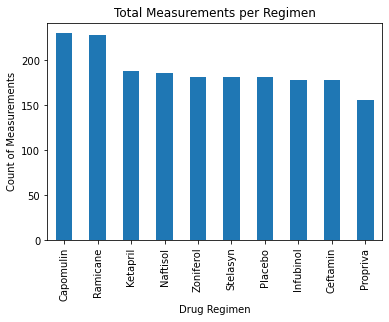

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_count = df['Drug Regimen'].value_counts()

drug_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Count of Measurements', title = 'Total Measurements per Regimen')

Text(0.5, 1.0, 'Total Measurements per Regimen')

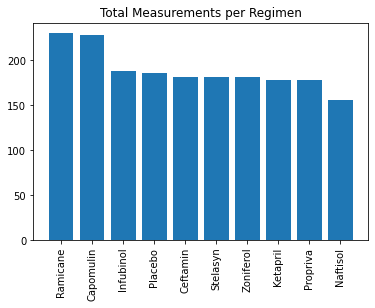

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(df['Drug Regimen'].unique(), df['Drug Regimen'].value_counts())
plt.xticks(rotation='vertical')
plt.title('Total Measurements per Regimen')

<AxesSubplot:title={'center':'Male vs Female Distribution'}, ylabel='Sex'>

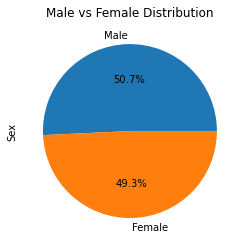

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df['Sex'].value_counts().plot(kind='pie', title = 'Male vs Female Distribution', autopct='%.1f%%')

Text(0.5, 1.0, 'Male vs Female Distribution')

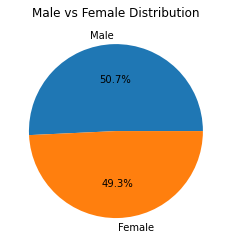

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].unique(), autopct='%.1f%%')
plt.title('Male vs Female Distribution')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_gped = df.groupby('Mouse ID').max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
quart_df = df.merge(mouse_gped['Timepoint'], how='inner', on=['Mouse ID', 'Timepoint'])

quart_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treat = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treat:
    ft_vol = quart_df.loc[quart_df['Drug Regimen'] == x]['Tumor Volume (mm3)']
    vol.append(ft_vol)

    quartiles = ft_vol.quantile([.25,.5,.75])
    uq = quartiles[.75]
    lq = quartiles[.25]
    iq = uq - lq
    ub = uq + 1.5 * iq
    lb = lq - 1.5 * iq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outlier = ft_vol.loc[(ft_vol < lb) | (ft_vol > ub)]
    
    
    if len(outlier) > 0:
        print(f'{x} has {len(outlier)} outlier(s)')


Infubinol has 1 outlier(s)


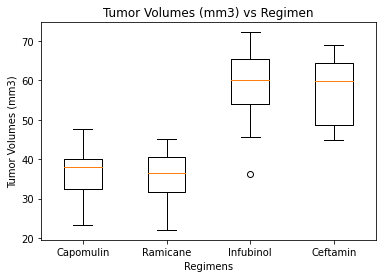

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes (mm3) vs Regimen')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.set_xlabel('Regimens')
ax1.boxplot(vol)
ax1.set_xticklabels(treat)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, "Mouse 1509 Tumor Volume Over Time with ['Capomulin']")

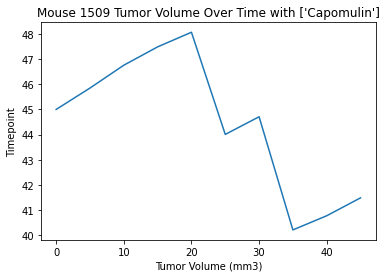

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m1509 = df.loc[df['Mouse ID'] == 'l509']

plt.plot(m1509['Timepoint'], m1509['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.title(f"Mouse 1509 Tumor Volume Over Time with {m1509['Drug Regimen'].unique()}")

Text(0.5, 1.0, 'Mouse Weight vs Average Tumor Volume')

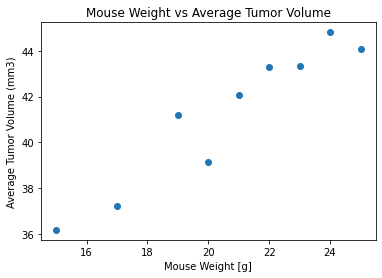

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = df.loc[df['Drug Regimen'] == 'Capomulin']

gped_weight = capomulin.groupby('Weight (g)')

plt.scatter(gped_weight['Weight (g)'].unique(), gped_weight['Tumor Volume (mm3)'].mean())
plt.xlabel('Mouse Weight [g]')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')

## Correlation and Regression

Text(18, 38, 'y = 0.89x + 22.76')

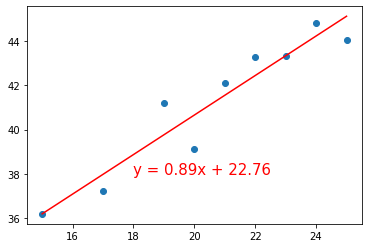

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = gped_weight['Weight (g)'].mean()
y_values = gped_weight['Tumor Volume (mm3)'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")